<a href="https://colab.research.google.com/github/madhu1096/Classification-ML-Models/blob/master/EDA_%2B_Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

In [6]:
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv('/content/drive/My Drive/data1/train.csv')

In [ ]:
dataset.head(2)

In [8]:
dataset.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [23]:
temp_train = pd.DataFrame(dataset['Hospital_type_code'])
temp_train['Hospital_region_code'] = dataset['Hospital_region_code']
temp_train['Department'] = dataset['Department']
temp_train['Ward_Type'] = dataset['Ward_Type']
temp_train['Ward_Facility_Code'] = dataset['Ward_Facility_Code']
temp_train['Type of Admission'] = dataset['Type of Admission']
temp_train['Severity of Illness'] = dataset['Severity of Illness']
temp_train['Age'] = dataset['Age']
temp_train['Admission_Deposit'] = dataset['Admission_Deposit']
temp_train['Stay'] = dataset['Stay']

In [ ]:
temp_train.head(3)

In [ ]:
temp_train['Stay'].value_counts()

In [18]:
temp_train.columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [24]:
X  = temp_train.iloc[:, :-2].values
y  = temp_train.iloc[:, -1].values

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
ct = ColumnTransformer(transformers=[('encoder1', OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')
X  = ct.fit_transform(X)
y=LabelEncoder().fit_transform(y)

# Visualization


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
x=np.arange(0,10)
y=np.arange(11,21)

In [ ]:
plt.scatter(x,y,c='g')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Graph in 2D')

In [ ]:
plt.subplot(2,2,1)
plt.plot(x,y,'r--')
plt.subplot(2,2,2)
plt.plot(x,y,'g*--')
plt.subplot(2,2,3)
plt.plot(x,y,'bo')
plt.subplot(2,2,4)
plt.plot(x,y,'go')

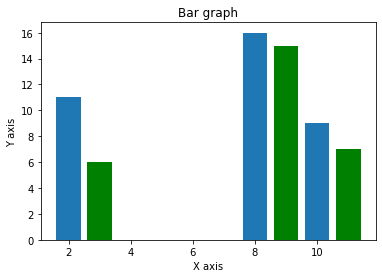

In [ ]:
x = [2,8,10] 
y = [11,16,9]  

x2 = [3,9,11] 
y2 = [6,15,7] 
plt.bar(x, y) 
plt.bar(x2, y2, color = 'g') 
plt.title('Bar graph') 
plt.ylabel('Y axis') 
plt.xlabel('X axis')  

plt.show()

In [ ]:
import seaborn as sns

In [ ]:
df=sns.load_dataset("tips")

In [ ]:
df.head(3)

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr())

In [ ]:
sns.jointplot(x=df['tip'],y=df['total_bill'],kind='hex')

In [ ]:
sns.jointplot(x='tip',y='total_bill',data=df,kind='reg')

In [ ]:
sns.pairplot(df,hue='sex')

In [ ]:
sns.distplot(df['tip'])

#EDA

##Using sweetviz

In [ ]:
pip install sweetviz

In [ ]:
import pandas as  pd
df = pd.read_csv('/content/drive/My Drive/loan data/train_ctrUa4K.csv')

In [ ]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(df)
#display the report
advert_report.show_html('Advertising.html')

In [ ]:
df1 = sv.compare(df[10000:], df[:])
df1.show_html('Compare.html')

##Using Pandas - Profiling

In [ ]:
!pip install -U pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
diab_data=load_diabetes()
df=pd.DataFrame(data=diab_data.data,columns=diab_data.feature_names)

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_widgets()

In [ ]:
profile.to_file("output.html")

#Feature selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [ ]:
np.shape(X)

In [31]:
dfscores = pd.DataFrame(fit.scores_)

In [34]:
list1=[i for i in range(43)]

In [36]:
dfcolumns = pd.DataFrame(list1)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
featureScores

In [ ]:
print(featureScores.nlargest(30,'Score'))